# Final Project:

## Predicting Housing prices in NC

## Anish Adimulam

In [76]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



np.set_printoptions(suppress=True)

In [78]:
df = pd.read_csv('realtor-data.zip.csv')

In [79]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [80]:
mask = df['state'] == 'North Carolina'


In [81]:
mask

0          False
1          False
2          False
3          False
4          False
           ...  
2226377    False
2226378    False
2226379    False
2226380    False
2226381    False
Name: state, Length: 2226382, dtype: bool

In [82]:
df = df[mask]

In [83]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
255310,71656.0,for_sale,15000.0,NaN,NaN,0.35,1925063.0,Hertford,North Carolina,27944.0,NaN,NaN
255313,71656.0,for_sale,15000.0,NaN,NaN,0.34,1925064.0,Hertford,North Carolina,27944.0,NaN,NaN
255527,95286.0,for_sale,158000.0,3.0,2.0,NaN,1543016.0,Elizabeth City,North Carolina,27909.0,1178.0,2021-02-23
255608,45867.0,for_sale,299900.0,3.0,3.0,2.30,249496.0,South Mills,North Carolina,27976.0,NaN,NaN
255622,45867.0,for_sale,750000.0,4.0,4.0,10.02,1843534.0,Moyock,North Carolina,27958.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,sold,475000.0,2.0,2.0,7.46,746668.0,Clyde,North Carolina,28721.0,1039.0,2022-02-16
1754748,106343.0,sold,675000.0,3.0,4.0,8.40,1097746.0,Waynesville,North Carolina,28785.0,2849.0,2022-02-15
1754752,106343.0,sold,274900.0,2.0,3.0,0.37,984840.0,Waynesville,North Carolina,28785.0,1902.0,2022-02-14
1754754,81311.0,sold,199000.0,3.0,2.0,0.69,463186.0,Waynesville,North Carolina,28785.0,1450.0,2022-02-14


In [84]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
255310,71656.0,for_sale,15000.0,NaN,NaN,0.35,1925063.0,Hertford,North Carolina,27944.0,NaN,NaN
255313,71656.0,for_sale,15000.0,NaN,NaN,0.34,1925064.0,Hertford,North Carolina,27944.0,NaN,NaN
255527,95286.0,for_sale,158000.0,3.0,2.0,NaN,1543016.0,Elizabeth City,North Carolina,27909.0,1178.0,2021-02-23
255608,45867.0,for_sale,299900.0,3.0,3.0,2.30,249496.0,South Mills,North Carolina,27976.0,NaN,NaN
255622,45867.0,for_sale,750000.0,4.0,4.0,10.02,1843534.0,Moyock,North Carolina,27958.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,sold,475000.0,2.0,2.0,7.46,746668.0,Clyde,North Carolina,28721.0,1039.0,2022-02-16
1754748,106343.0,sold,675000.0,3.0,4.0,8.40,1097746.0,Waynesville,North Carolina,28785.0,2849.0,2022-02-15
1754752,106343.0,sold,274900.0,2.0,3.0,0.37,984840.0,Waynesville,North Carolina,28785.0,1902.0,2022-02-14
1754754,81311.0,sold,199000.0,3.0,2.0,0.69,463186.0,Waynesville,North Carolina,28785.0,1450.0,2022-02-14


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85745 entries, 255310 to 1754903
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     85141 non-null  float64
 1   status          85745 non-null  object 
 2   price           85465 non-null  float64
 3   bed             54935 non-null  float64
 4   bath            53850 non-null  float64
 5   acre_lot        77706 non-null  float64
 6   street          85693 non-null  float64
 7   city            85738 non-null  object 
 8   state           85745 non-null  object 
 9   zip_code        85738 non-null  float64
 10  house_size      44205 non-null  float64
 11  prev_sold_date  45869 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.5+ MB


In [86]:
df.isnull().sum()

brokered_by         604
status                0
price               280
bed               30810
bath              31895
acre_lot           8039
street               52
city                  7
state                 0
zip_code              7
house_size        41540
prev_sold_date    39876
dtype: int64

In [87]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,85141.000000,8.546500e+04,54935.000000,53850.000000,77706.000000,8.569300e+04,85738.000000,44205.000000
mean,51354.813733,3.351288e+05,3.221061,2.625552,8.612560,1.067331e+06,28185.047307,2058.120597
std,31886.059397,5.308829e+05,1.132046,1.204287,467.625503,6.195566e+05,680.355499,4118.064337
min,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.600000e+01,23736.000000,209.000000
25%,22482.000000,9.990000e+04,3.000000,2.000000,0.270000,5.279410e+05,27886.000000,1357.000000
50%,52640.000000,2.499000e+05,3.000000,2.000000,0.550000,1.095465e+06,28326.000000,1806.000000
75%,78552.000000,3.990000e+05,4.000000,3.000000,1.390000,1.632175e+06,28604.000000,2433.000000
max,110137.000000,3.750000e+07,90.000000,54.000000,100000.000000,2.001342e+06,99999.000000,800900.000000


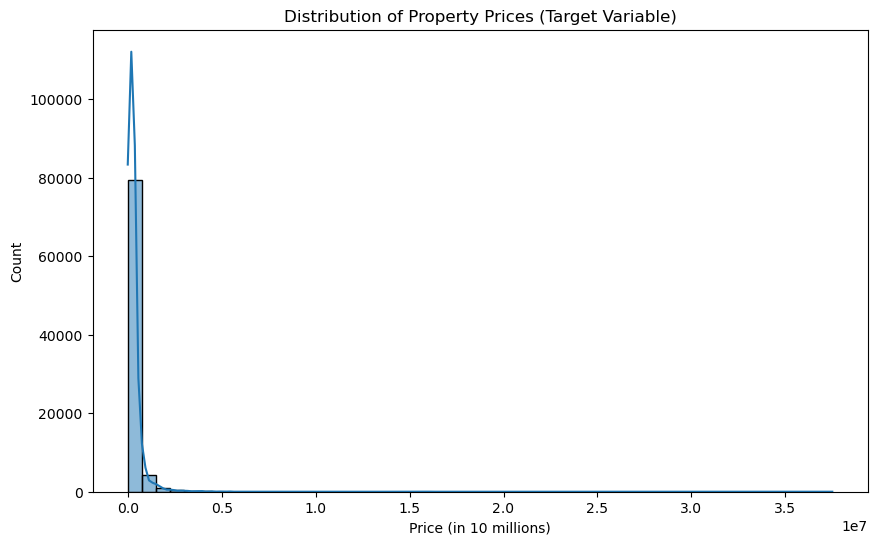

In [88]:
plt.figure(figsize=(10, 6))
# Plot a histogram of the price column
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices (Target Variable)')
plt.xlabel('Price (in 10 millions)')
plt.ylabel('Count')
plt.show()

C:\Users\aadim\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


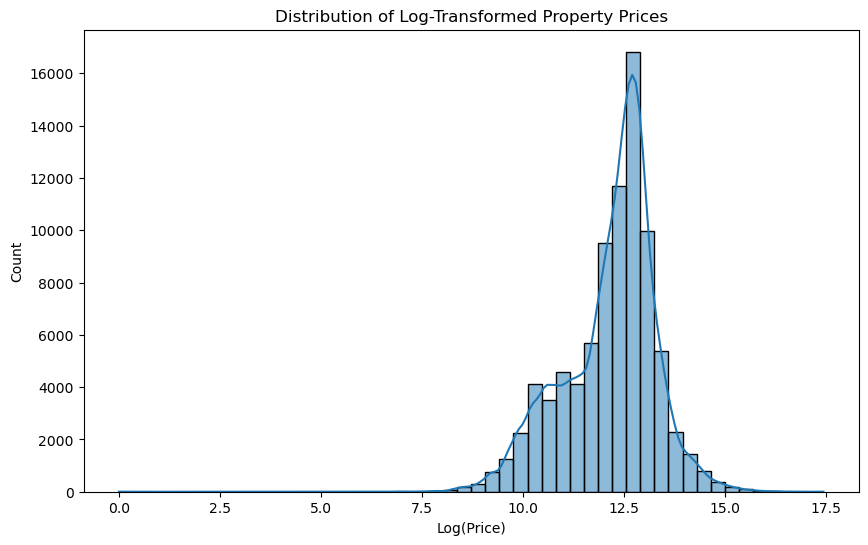

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['price']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Property Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.show()

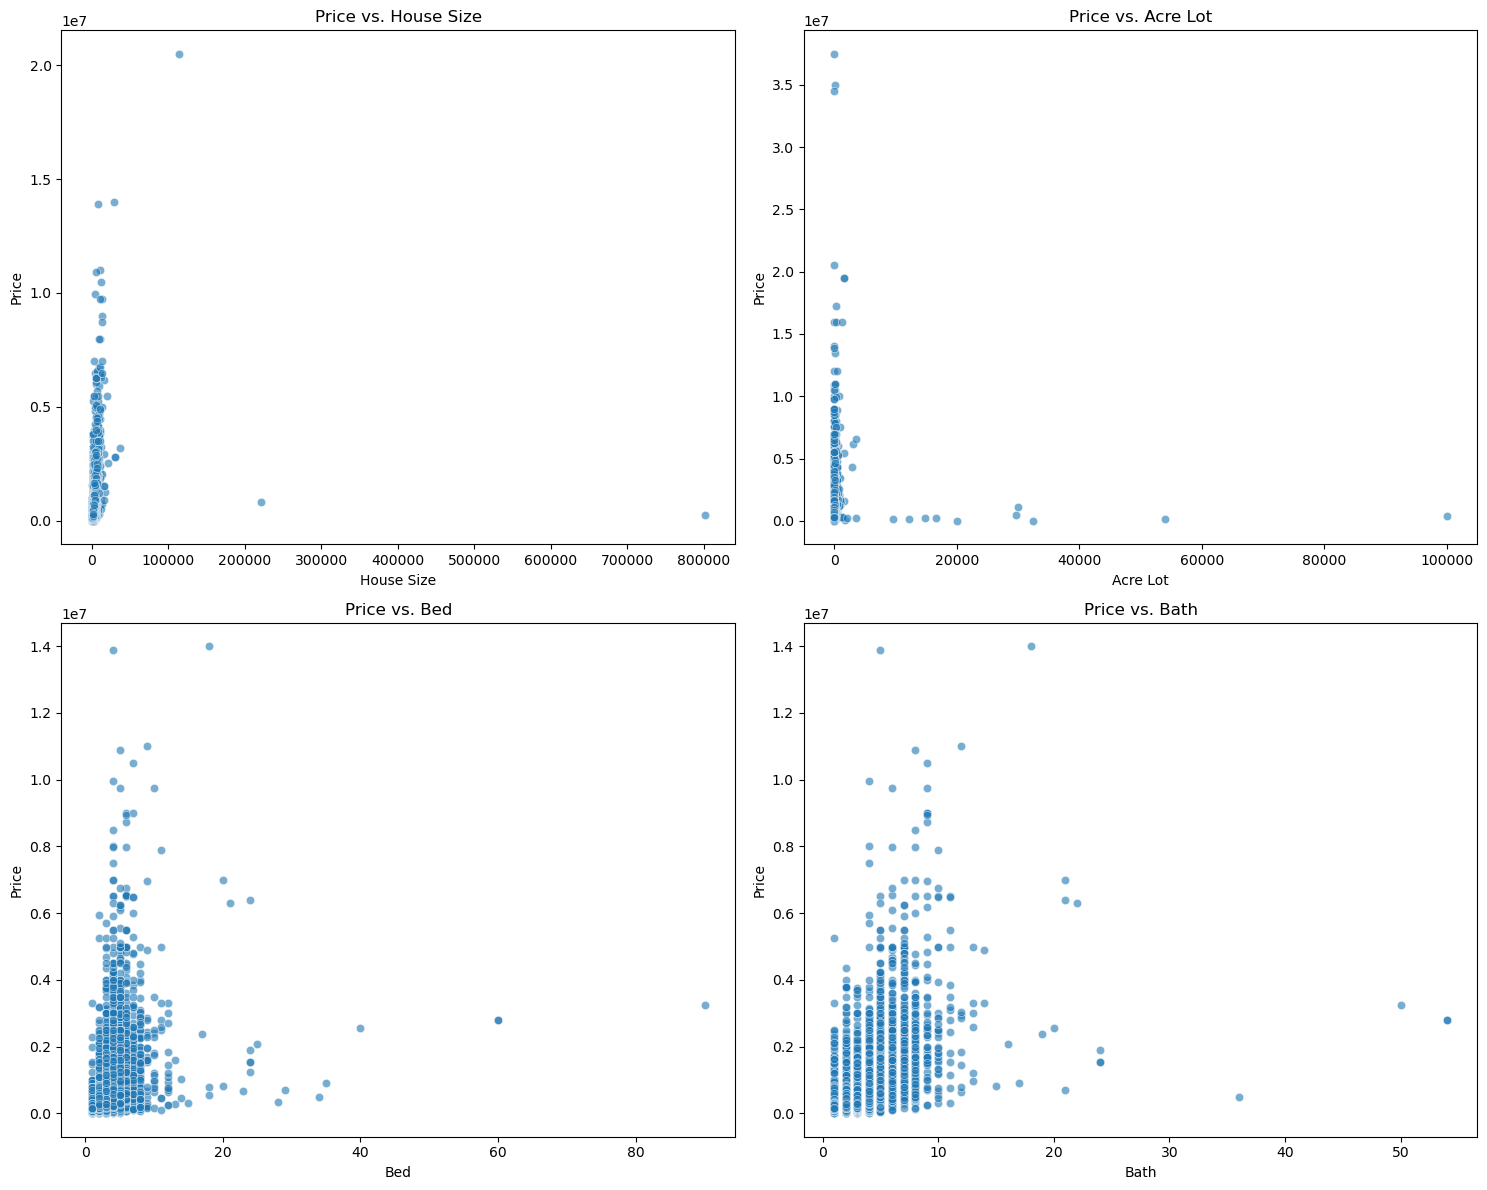

In [95]:
features_to_plot = ['house_size', 'acre_lot', 'bed', 'bath']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=df[feature], y=df['price'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Price vs. {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

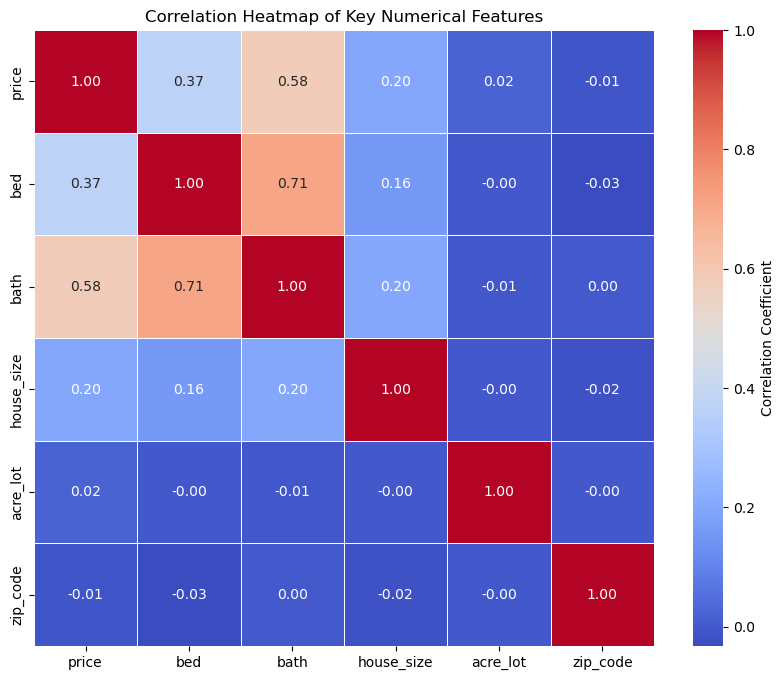

In [101]:
numerical_cols = ['price', 'bed', 'bath', 'house_size', 'acre_lot', 'zip_code']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

In [17]:
#capping outliers
features_to_cap = ['acre_lot', 'house_size']

for feature in features_to_cap:
    
    P99 = df[feature].quantile(0.99)
    df.loc[df[feature] > P99, feature] = P99

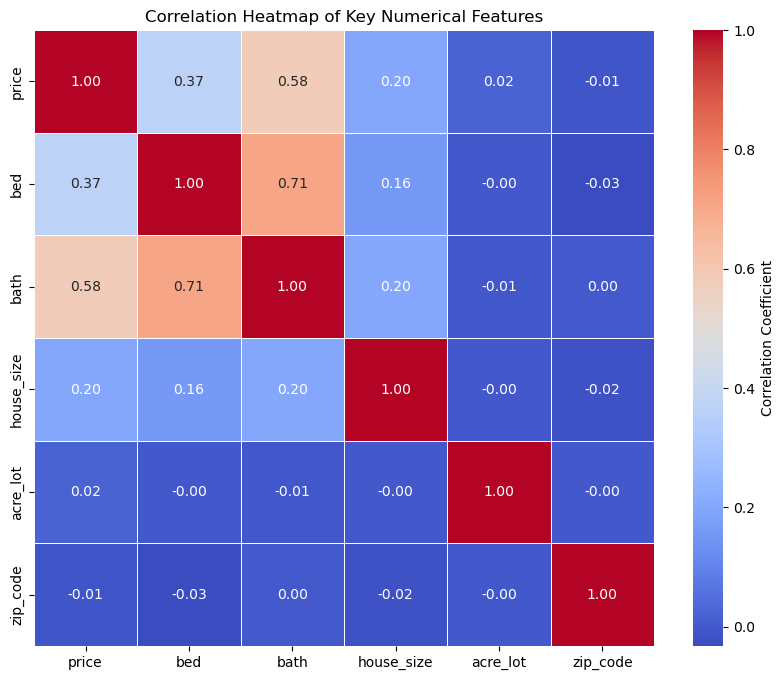

In [104]:
numerical_cols = ['price', 'bed', 'bath', 'house_size', 'acre_lot', 'zip_code']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

In [105]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
255310,71656.0,for_sale,15000.0,NaN,NaN,0.35,1925063.0,Hertford,North Carolina,27944.0,NaN,NaN
255313,71656.0,for_sale,15000.0,NaN,NaN,0.34,1925064.0,Hertford,North Carolina,27944.0,NaN,NaN
255527,95286.0,for_sale,158000.0,3.0,2.0,NaN,1543016.0,Elizabeth City,North Carolina,27909.0,1178.0,2021-02-23
255608,45867.0,for_sale,299900.0,3.0,3.0,2.30,249496.0,South Mills,North Carolina,27976.0,NaN,NaN
255622,45867.0,for_sale,750000.0,4.0,4.0,10.02,1843534.0,Moyock,North Carolina,27958.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,sold,475000.0,2.0,2.0,7.46,746668.0,Clyde,North Carolina,28721.0,1039.0,2022-02-16
1754748,106343.0,sold,675000.0,3.0,4.0,8.40,1097746.0,Waynesville,North Carolina,28785.0,2849.0,2022-02-15
1754752,106343.0,sold,274900.0,2.0,3.0,0.37,984840.0,Waynesville,North Carolina,28785.0,1902.0,2022-02-14
1754754,81311.0,sold,199000.0,3.0,2.0,0.69,463186.0,Waynesville,North Carolina,28785.0,1450.0,2022-02-14


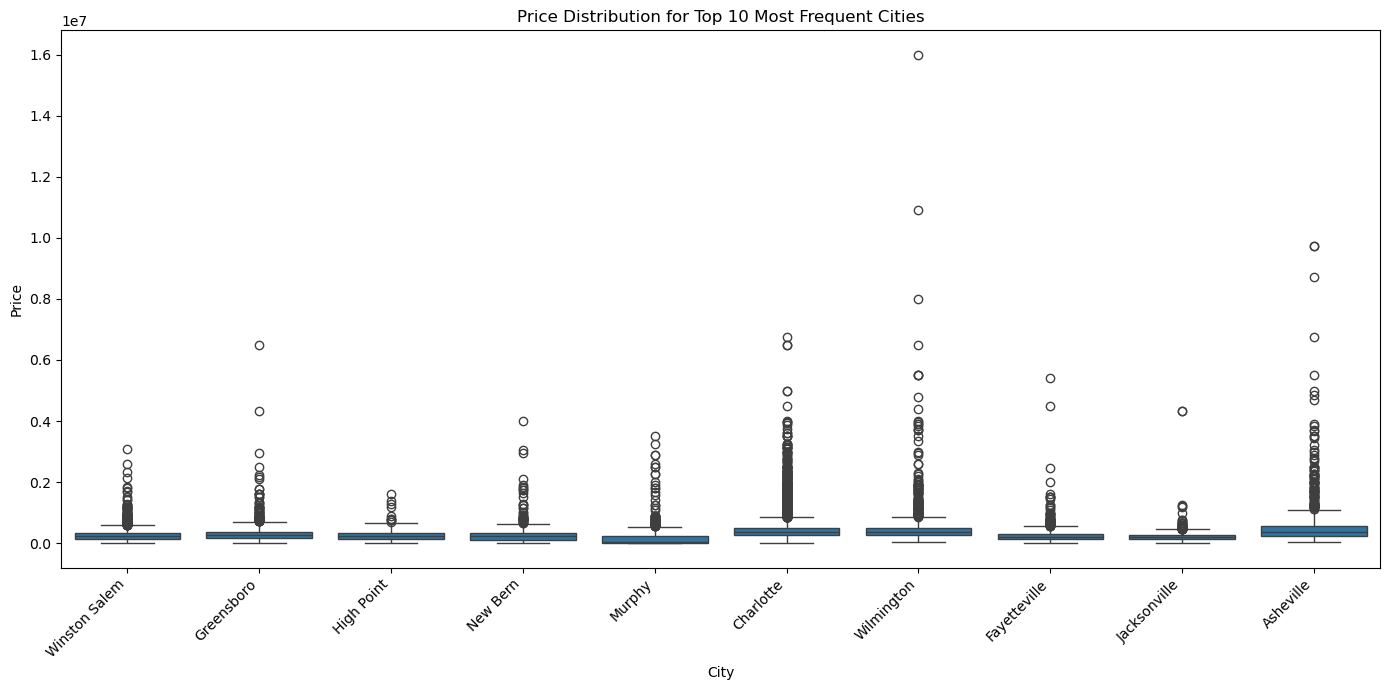

In [107]:
top_cities = df['city'].value_counts().nlargest(10).index
df_top_cities = df[df['city'].isin(top_cities)]
plt.figure(figsize=(14, 7))
sns.boxplot(x='city', y='price', data=df_top_cities)
plt.title('Price Distribution for Top 10 Most Frequent Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [108]:
city_counts = df['city'].value_counts()

print(city_counts.head(20))
print(df['city'].nunique())

city
Charlotte         6875
Winston Salem     2362
Wilmington        1646
Greensboro        1596
Jacksonville      1579
Fayetteville      1179
Murphy            1162
New Bern          1027
Asheville          979
High Point         892
Hendersonville     882
Leland             876
Raleigh            827
Hayesville         818
Greenville         780
Gastonia           726
Lexington          691
Southport          638
Durham             637
Franklin           626
Name: count, dtype: int64
785


In [110]:
#Imputating missing values
imputation_cols = ['bed', 'bath', 'house_size', 'acre_lot']

# Calculate the median for each column
# NOTE: It's crucial to calculate medians on the TRAINING data only, 
# but for simplicity in this general step, we use the whole dataframe 'df'.
medians = df[imputation_cols].median()

print("Median values used for imputation:\n", medians)


df[imputation_cols] = df[imputation_cols].fillna(medians)


print("\nMissing values after imputation:")
print(df[imputation_cols].isnull().sum())

Median values used for imputation:
 bed              3.00
bath             2.00
house_size    1806.00
acre_lot         0.55
dtype: float64

Missing values after imputation:
bed           0
bath          0
house_size    0
acre_lot      0
dtype: int64


C:\Users\aadim\AppData\Local\Temp\ipykernel_40872\3767385451.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[imputation_cols] = df[imputation_cols].fillna(medians)


In [111]:
df['log_price'] = np.log(df['price'])

C:\Users\aadim\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\aadim\AppData\Local\Temp\ipykernel_40872\3359182317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log(df['price'])


In [112]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,log_price
255310,71656.0,for_sale,15000.0,3.0,2.0,0.35,1925063.0,Hertford,North Carolina,27944.0,1806.0,NaN,9.615805
255313,71656.0,for_sale,15000.0,3.0,2.0,0.34,1925064.0,Hertford,North Carolina,27944.0,1806.0,NaN,9.615805
255527,95286.0,for_sale,158000.0,3.0,2.0,0.55,1543016.0,Elizabeth City,North Carolina,27909.0,1178.0,2021-02-23,11.970350
255608,45867.0,for_sale,299900.0,3.0,3.0,2.30,249496.0,South Mills,North Carolina,27976.0,1806.0,NaN,12.611204
255622,45867.0,for_sale,750000.0,4.0,4.0,10.02,1843534.0,Moyock,North Carolina,27958.0,1806.0,NaN,13.527828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,sold,475000.0,2.0,2.0,7.46,746668.0,Clyde,North Carolina,28721.0,1039.0,2022-02-16,13.071070
1754748,106343.0,sold,675000.0,3.0,4.0,8.40,1097746.0,Waynesville,North Carolina,28785.0,2849.0,2022-02-15,13.422468
1754752,106343.0,sold,274900.0,2.0,3.0,0.37,984840.0,Waynesville,North Carolina,28785.0,1902.0,2022-02-14,12.524163
1754754,81311.0,sold,199000.0,3.0,2.0,0.69,463186.0,Waynesville,North Carolina,28785.0,1450.0,2022-02-14,12.201060


In [114]:
df['has_prev_sold_date'] = df['prev_sold_date'].notna().astype(int)
df = df.drop('prev_sold_date', axis=1)

C:\Users\aadim\AppData\Local\Temp\ipykernel_40872\1671418768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_prev_sold_date'] = df['prev_sold_date'].notna().astype(int)


In [116]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,log_price,has_prev_sold_date
255310,71656.0,for_sale,15000.0,3.0,2.0,0.35,1925063.0,Hertford,North Carolina,27944.0,1806.0,9.615805,0
255313,71656.0,for_sale,15000.0,3.0,2.0,0.34,1925064.0,Hertford,North Carolina,27944.0,1806.0,9.615805,0
255527,95286.0,for_sale,158000.0,3.0,2.0,0.55,1543016.0,Elizabeth City,North Carolina,27909.0,1178.0,11.970350,1
255608,45867.0,for_sale,299900.0,3.0,3.0,2.30,249496.0,South Mills,North Carolina,27976.0,1806.0,12.611204,0
255622,45867.0,for_sale,750000.0,4.0,4.0,10.02,1843534.0,Moyock,North Carolina,27958.0,1806.0,13.527828,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,sold,475000.0,2.0,2.0,7.46,746668.0,Clyde,North Carolina,28721.0,1039.0,13.071070,1
1754748,106343.0,sold,675000.0,3.0,4.0,8.40,1097746.0,Waynesville,North Carolina,28785.0,2849.0,13.422468,1
1754752,106343.0,sold,274900.0,2.0,3.0,0.37,984840.0,Waynesville,North Carolina,28785.0,1902.0,12.524163,1
1754754,81311.0,sold,199000.0,3.0,2.0,0.69,463186.0,Waynesville,North Carolina,28785.0,1450.0,12.201060,1


In [117]:
df = pd.get_dummies(df, columns=['status'], drop_first=True) 

In [120]:
df

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,log_price,has_prev_sold_date,status_ready_to_build,status_sold
255310,71656.0,15000.0,3.0,2.0,0.35,1925063.0,Hertford,North Carolina,27944.0,1806.0,9.615805,0,False,False
255313,71656.0,15000.0,3.0,2.0,0.34,1925064.0,Hertford,North Carolina,27944.0,1806.0,9.615805,0,False,False
255527,95286.0,158000.0,3.0,2.0,0.55,1543016.0,Elizabeth City,North Carolina,27909.0,1178.0,11.970350,1,False,False
255608,45867.0,299900.0,3.0,3.0,2.30,249496.0,South Mills,North Carolina,27976.0,1806.0,12.611204,0,False,False
255622,45867.0,750000.0,4.0,4.0,10.02,1843534.0,Moyock,North Carolina,27958.0,1806.0,13.527828,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,475000.0,2.0,2.0,7.46,746668.0,Clyde,North Carolina,28721.0,1039.0,13.071070,1,False,True
1754748,106343.0,675000.0,3.0,4.0,8.40,1097746.0,Waynesville,North Carolina,28785.0,2849.0,13.422468,1,False,True
1754752,106343.0,274900.0,2.0,3.0,0.37,984840.0,Waynesville,North Carolina,28785.0,1902.0,12.524163,1,False,True
1754754,81311.0,199000.0,3.0,2.0,0.69,463186.0,Waynesville,North Carolina,28785.0,1450.0,12.201060,1,False,True


In [125]:
zip_counts = df['zip_code'].value_counts()

# threshold for zip codes
RARE_THRESHOLD = 600
rare_zips = zip_counts[zip_counts < RARE_THRESHOLD].index
df['zip_code_encoded'] = np.where(df['zip_code'].isin(rare_zips), 'Other_Zip', df['zip_code'].astype(str))
df = pd.get_dummies(df, columns=['zip_code_encoded'], drop_first=True)
df = df.drop(['city', 'zip_code', 'street'], axis=1)

In [128]:
df

,brokered_by,price,bed,bath,acre_lot,state,house_size,log_price,has_prev_sold_date,status_ready_to_build,...,zip_code_encoded_28462.0,zip_code_encoded_28467.0,zip_code_encoded_28540.0,zip_code_encoded_28546.0,zip_code_encoded_28604.0,zip_code_encoded_28734.0,zip_code_encoded_28904.0,zip_code_encoded_28906.0,zip_code_encoded_Other_Zip,zip_code_encoded_nan
255310,71656.0,15000.0,3.0,2.0,0.35,North Carolina,1806.0,9.615805,0,False,...,False,False,False,False,False,False,False,False,True,False
255313,71656.0,15000.0,3.0,2.0,0.34,North Carolina,1806.0,9.615805,0,False,...,False,False,False,False,False,False,False,False,True,False
255527,95286.0,158000.0,3.0,2.0,0.55,North Carolina,1178.0,11.970350,1,False,...,False,False,False,False,False,False,False,False,True,False
255608,45867.0,299900.0,3.0,3.0,2.30,North Carolina,1806.0,12.611204,0,False,...,False,False,False,False,False,False,False,False,True,False
255622,45867.0,750000.0,4.0,4.0,10.02,North Carolina,1806.0,13.527828,0,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754746,30788.0,475000.0,2.0,2.0,7.46,North Carolina,1039.0,13.071070,1,False,...,False,False,False,False,False,False,False,False,True,False
1754748,106343.0,675000.0,3.0,4.0,8.40,North Carolina,2849.0,13.422468,1,False,...,False,False,False,False,False,False,False,False,True,False
1754752,106343.0,274900.0,2.0,3.0,0.37,North Carolina,1902.0,12.524163,1,False,...,False,False,False,False,False,False,False,False,True,False
1754754,81311.0,199000.0,3.0,2.0,0.69,North Carolina,1450.0,12.201060,1,False,...,False,False,False,False,False,False,False,False,True,False


In [130]:
#Scaling
inf_mask = np.isinf(df['log_price'])
inf_count = inf_mask.sum()

if inf_count > 0:
    df = df[~inf_mask].copy() 
X = df.drop(['price', 'log_price', 'state','has_prev_sold_date','status_ready_to_build'], axis=1, errors='ignore') # Drop target and constant columns
y = df['price']
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [132]:
print("Checking for remaining NaNs in the feature matrix X:")
print(X.isnull().sum()[X.isnull().sum() > 0])

Checking for remaining NaNs in the feature matrix X:
brokered_by    604
dtype: int64


In [136]:
df_combined = pd.concat([X, y], axis=1)
df_cleaned = df_combined.dropna()
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

print(f"\nOriginal number of rows: {df_combined.shape[0]}")
print(f"Number of rows after dropping NaNs: {df_cleaned.shape[0]}")
print(f"Number of rows dropped: {df_combined.shape[0] - df_cleaned.shape[0]}")
inf_count = np.isinf(df['price']).sum()


Original number of rows: 85726
Number of rows after dropping NaNs: 84842
Number of rows dropped: 884


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 67873 rows
Testing set size: 16969 rows


In [140]:

print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression trained.")

print("\nTraining Random Forest Regressor model...")
rf_model = RandomForestRegressor(n_estimators=100,
                                 max_depth=30,    
                                 random_state=42, 
                                 n_jobs=-1)      
rf_model.fit(X, y)
print("Random Forest Regressor trained.")

Training Linear Regression model...
Linear Regression trained.

Training Random Forest Regressor model...
Random Forest Regressor trained.


In [141]:
lr_preds_log = lr_model.predict(X_test)
rf_preds_log = rf_model.predict(X_test)



#y_test_price = np.exp(y_test)
y_test_price = y_test

#OLS
#lr_preds_price = np.exp(lr_preds_log)
lr_preds_price = lr_preds_log

#RFR
#rf_preds_price = np.exp(rf_preds_log)
rf_preds_price = rf_preds_log

print("--- MODEL EVALUATION RESULTS (Original Price Scale) ---")
print("\n[A] Ordinary Least Squares (OLS) Linear Regression:")

# Calculate R2 and RMSE for OLS
lr_r2 = r2_score(y_test_price, lr_preds_price)
lr_rmse = np.sqrt(mean_squared_error(y_test_price, lr_preds_price))

print(f"  R-squared (R2) Score: {lr_r2:.4f}")
print(f"  Root Mean Squared Error (RMSE): ${lr_rmse:,.2f}")


print("\n[B] Random Forest Regressor:")

rf_r2 = r2_score(y_test_price, rf_preds_price)
rf_rmse = np.sqrt(mean_squared_error(y_test_price, rf_preds_price))

print(f"  R-squared (R2) Score: {rf_r2:.4f}")
print(f"  Root Mean Squared Error (RMSE): ${rf_rmse:,.2f}")

--- MODEL EVALUATION RESULTS (Original Price Scale) ---

[A] Ordinary Least Squares (OLS) Linear Regression:
  R-squared (R2) Score: 0.2681
  Root Mean Squared Error (RMSE): $401,645.17

[B] Random Forest Regressor:
  R-squared (R2) Score: 0.9052
  Root Mean Squared Error (RMSE): $144,555.68


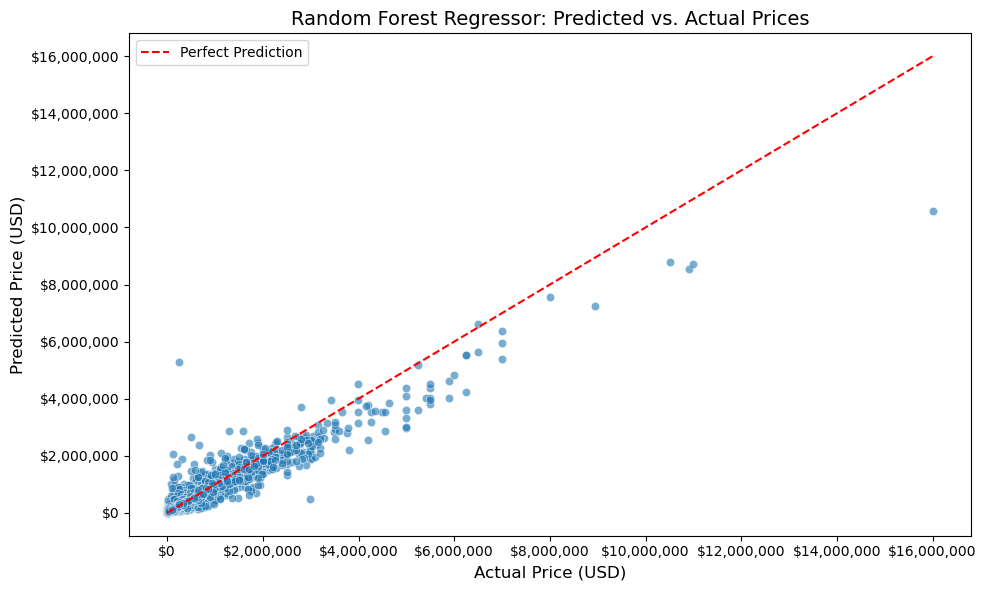

In [142]:

rf_preds_price = rf_model.predict(X_test)

y_test_price = y_test

comparison_df = pd.DataFrame({
    'Actual Price': y_test_price,
    'Predicted Price': rf_preds_price
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=comparison_df, alpha=0.6)

max_val = max(comparison_df['Actual Price'].max(), comparison_df['Predicted Price'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Random Forest Regressor: Predicted vs. Actual Prices', fontsize=14)
plt.xlabel('Actual Price (USD)', fontsize=12)
plt.ylabel('Predicted Price (USD)', fontsize=12)

formatter = FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.legend()
plt.tight_layout()
plt.show()